# 1. Import neceesary library

In [1]:
import pandas as pd
import numpy as np
import glob
import geopandas
import matplotlib.pyplot as plt

# 2. Read all files

a. Crime data files 
<br> 
<br>- Data sources: https://data.police.uk/data/
<br>
<br>- Crime data reported by all forces from Sep 2024 to Aug 2025 

In [2]:
all_files = glob.glob('**/*.csv', recursive=True)

dfs = []

if not all_files:
    print("Warning: No CSV files were found in any sub-folders.")
else:
    print(f"Found {len(all_files)} files to read.")
    for filename in all_files:
        print(f"Reading: {filename}")
        df = pd.read_csv(filename)
        dfs.append(df)

Found 518 files to read.
Reading: raw_data\2024-09\2024-09-avon-and-somerset-street.csv
Reading: raw_data\2024-09\2024-09-bedfordshire-street.csv
Reading: raw_data\2024-09\2024-09-btp-street.csv
Reading: raw_data\2024-09\2024-09-cambridgeshire-street.csv
Reading: raw_data\2024-09\2024-09-cheshire-street.csv
Reading: raw_data\2024-09\2024-09-city-of-london-street.csv
Reading: raw_data\2024-09\2024-09-cleveland-street.csv
Reading: raw_data\2024-09\2024-09-cumbria-street.csv
Reading: raw_data\2024-09\2024-09-derbyshire-street.csv
Reading: raw_data\2024-09\2024-09-devon-and-cornwall-street.csv
Reading: raw_data\2024-09\2024-09-dorset-street.csv
Reading: raw_data\2024-09\2024-09-durham-street.csv
Reading: raw_data\2024-09\2024-09-dyfed-powys-street.csv
Reading: raw_data\2024-09\2024-09-essex-street.csv
Reading: raw_data\2024-09\2024-09-gloucestershire-street.csv
Reading: raw_data\2024-09\2024-09-gwent-street.csv
Reading: raw_data\2024-09\2024-09-hampshire-street.csv
Reading: raw_data\2024-0

Concatenates all files into crime data frame (cdf)

In [3]:
cdf = pd.concat(dfs)
cdf.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,d83930305b75e07a70f9751a24613ec1a2831d55dfe9d9...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-0.530916,50.817041,On or near Thorncroft Road,E01031409,Arun 009C,Violence and sexual offences,Status update unavailable,NaN
1,66e655aeb1ea5dd2659bfebd8b1ace7c0637ba677f5cb3...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-0.229029,51.577574,On or near Nicoll Place,E01000310,Barnet 034C,Vehicle crime,Status update unavailable,NaN
2,NaN,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.508867,51.416147,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
3,b69cb28b05dfa712bada7844b95be5b4718c71e493d78e...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491928,51.424186,On or near Octavius Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Unable to prosecute suspect,NaN
4,6135a715e16ed6a9396dc41c2475eea2e73559fc1fce2b...,2024-09,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.510162,51.410998,On or near Monmouth Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,NaN


b. UK's boundaries data file (ukb)
<br> 
<br>- Data sources: https://geoportal.statistics.gov.uk/datasets/b976e08d5c894df3901963469bd4f84f_0/explore?showTable=true

In [4]:
ukb = geopandas.read_file("D:/ukmap/ukmap.shp")
ukb.head()

,FID,LSOA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,LSOA21CD_1,RUC21CD,RUC21NM,Urban_rura,Shape_Leng,Shape__Are,Shape__Len,geometry
0,1,E01000001,City of London 001A,None,532123,181632,51.5182,-0.097150,3478c558-3297-4e2b-979e-e29dd9ff3bf5,E01000001,UN1,Urban: Nearer to a major town or city,Urban,1685.391557,157794.837975,1685.391557,"POLYGON ((532282.63 181906.496, 532248.249 181..."
1,2,E01000002,City of London 001B,None,532480,181715,51.5188,-0.091970,f2072109-b1ae-426c-b166-083cc32f1789,E01000002,UN1,Urban: Nearer to a major town or city,Urban,1804.827316,164882.111366,1804.827316,"POLYGON ((532746.813 181786.891, 532248.249 18..."
2,3,E01000003,City of London 001C,None,532239,182033,51.5217,-0.095330,a9009c33-9b6b-4230-ba62-fc3264806de4,E01000003,UN1,Urban: Nearer to a major town or city,Urban,909.253080,42216.046440,909.253080,"POLYGON ((532293.112 182068.355, 532419.592 18..."
3,4,E01000005,City of London 001E,None,533581,181283,51.5147,-0.076280,86aee0aa-079f-4f92-8f9d-5773824f4945,E01000005,UN1,Urban: Nearer to a major town or city,Urban,2028.716721,212700.741287,2028.716721,"POLYGON ((533604.265 181418.14, 533743.704 181..."
4,5,E01000006,Barking and Dagenham 016A,None,544994,184274,51.5387,0.089317,c33f1f5b-6b15-47a1-b046-b6a148a9f6d3,E01000006,UN1,Urban: Nearer to a major town or city,Urban,1716.731235,130551.232040,1716.731235,"POLYGON ((545271.849 184184.053, 545296.239 18..."


c. Brsitol population data file
<br> 
<br>- Data sources: https://www.bristol.gov.uk/council/statistics-census-information/population-of-bristol
<br>
<br>- To calculate the rate of crime per thousand residents, mid-2022 population estimates from the ONS are currently used to ensures that crime rates for the current year are brought into line as quickly as possible

In [5]:
bpd = pd.read_csv("D:/bristol_population/bristol_population.csv")
bpd.head()

,LSOA21_code,LSOA21_name,population
0,E01014485,Bristol 058A,1975
1,E01014486,Bristol 058C,2759
2,E01014487,Bristol 020A,2038
3,E01014488,Bristol 058B,2108
4,E01014489,Bristol 059A,2550


# 3. Exploratory Data Analysis and Data Cleaning

a. Crime data file

In [6]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5948057 entries, 0 to 4534
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  object 
 2   Reported by            object 
 3   Falls within           object 
 4   Longitude              float64
 5   Latitude               float64
 6   Location               object 
 7   LSOA code              object 
 8   LSOA name              object 
 9   Crime type             object 
 10  Last outcome category  object 
 11  Context                float64
dtypes: float64(3), object(9)
memory usage: 589.9+ MB


In [7]:
cdf.isnull().sum()

Crime ID                  982967
Month                          0
Reported by                    0
Falls within                   0
Longitude                  90172
Latitude                   90172
Location                       0
LSOA code                 228370
LSOA name                 228370
Crime type                     0
Last outcome category    1076561
Context                  5948057
dtype: int64

In [8]:
cdf = cdf.drop(columns=['Reported by', 'Falls within', 'Longitude', 'Latitude', 'Location', 'Last outcome category', 'Context'])
cdf.isnull().sum()

Crime ID      982967
Month              0
LSOA code     228370
LSOA name     228370
Crime type         0
dtype: int64

In [9]:
df = cdf.dropna()
print("Shape of original DataFrame:", cdf.shape)
print("Shape of cleaned DataFrame:", df.shape)
df.head()

Shape of original DataFrame: (5948057, 5)
Shape of cleaned DataFrame: (4784244, 5)


,Crime ID,Month,LSOA code,LSOA name,Crime type
0,d83930305b75e07a70f9751a24613ec1a2831d55dfe9d9...,2024-09,E01031409,Arun 009C,Violence and sexual offences
1,66e655aeb1ea5dd2659bfebd8b1ace7c0637ba677f5cb3...,2024-09,E01000310,Barnet 034C,Vehicle crime
3,b69cb28b05dfa712bada7844b95be5b4718c71e493d78e...,2024-09,E01014399,Bath and North East Somerset 001A,Criminal damage and arson
4,6135a715e16ed6a9396dc41c2475eea2e73559fc1fce2b...,2024-09,E01014399,Bath and North East Somerset 001A,Criminal damage and arson
5,a915c8aff98be766bedf7d25867b0c4ea6317328cfec49...,2024-09,E01014399,Bath and North East Somerset 001A,Public order


In [10]:
duplicate_id_count = df.duplicated().sum()
print(f"Number of rows with a duplicate: {duplicate_id_count}")
df[df.duplicated()].head()

Number of rows with a duplicate: 5806


,Crime ID,Month,LSOA code,LSOA name,Crime type
174,ec470432da033958d65415a97a98d3f88edcf32d13d60f...,2024-09,E01014478,Bath and North East Somerset 005B,Burglary
1351,1aaa99f3388217538682b5ab7373de6274d20b6b078e72...,2024-09,E01014469,Bath and North East Somerset 026A,Criminal damage and arson
4611,86ec45e30b12caf35bc2d6e5384d927700d5173086c90b...,2024-09,E01014501,Bristol 041A,Public order
5375,3bad43dbf8a5a00feacfc6efc9479e16dde60f0636c35b...,2024-09,E01014516,Bristol 050B,Drugs
5392,e372a4d16bbb3d520d19fbb981c603f7e9981a495938bc...,2024-09,E01014516,Bristol 050B,Violence and sexual offences


In [11]:
df.drop_duplicates()
df.head()

,Crime ID,Month,LSOA code,LSOA name,Crime type
0,d83930305b75e07a70f9751a24613ec1a2831d55dfe9d9...,2024-09,E01031409,Arun 009C,Violence and sexual offences
1,66e655aeb1ea5dd2659bfebd8b1ace7c0637ba677f5cb3...,2024-09,E01000310,Barnet 034C,Vehicle crime
3,b69cb28b05dfa712bada7844b95be5b4718c71e493d78e...,2024-09,E01014399,Bath and North East Somerset 001A,Criminal damage and arson
4,6135a715e16ed6a9396dc41c2475eea2e73559fc1fce2b...,2024-09,E01014399,Bath and North East Somerset 001A,Criminal damage and arson
5,a915c8aff98be766bedf7d25867b0c4ea6317328cfec49...,2024-09,E01014399,Bath and North East Somerset 001A,Public order


In [12]:
df = df.rename(columns={'Crime ID': 'crime_id', 'Month': 'time', 'LSOA code': 'lsoa_code', 'LSOA name': 'lsoa_name', 'Crime type': 'crime_type'})
df.head()

,crime_id,time,lsoa_code,lsoa_name,crime_type
0,d83930305b75e07a70f9751a24613ec1a2831d55dfe9d9...,2024-09,E01031409,Arun 009C,Violence and sexual offences
1,66e655aeb1ea5dd2659bfebd8b1ace7c0637ba677f5cb3...,2024-09,E01000310,Barnet 034C,Vehicle crime
3,b69cb28b05dfa712bada7844b95be5b4718c71e493d78e...,2024-09,E01014399,Bath and North East Somerset 001A,Criminal damage and arson
4,6135a715e16ed6a9396dc41c2475eea2e73559fc1fce2b...,2024-09,E01014399,Bath and North East Somerset 001A,Criminal damage and arson
5,a915c8aff98be766bedf7d25867b0c4ea6317328cfec49...,2024-09,E01014399,Bath and North East Somerset 001A,Public order


In [13]:
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df.head()

,crime_id,time,lsoa_code,lsoa_name,crime_type,year,month
0,d83930305b75e07a70f9751a24613ec1a2831d55dfe9d9...,2024-09-01,E01031409,Arun 009C,Violence and sexual offences,2024,9
1,66e655aeb1ea5dd2659bfebd8b1ace7c0637ba677f5cb3...,2024-09-01,E01000310,Barnet 034C,Vehicle crime,2024,9
3,b69cb28b05dfa712bada7844b95be5b4718c71e493d78e...,2024-09-01,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,2024,9
4,6135a715e16ed6a9396dc41c2475eea2e73559fc1fce2b...,2024-09-01,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,2024,9
5,a915c8aff98be766bedf7d25867b0c4ea6317328cfec49...,2024-09-01,E01014399,Bath and North East Somerset 001A,Public order,2024,9


In [14]:
df = df.drop(columns=['time'])
df = df[['lsoa_code', 'lsoa_name', 'year', 'month', 'crime_id', 'crime_type']]
df.head()

,lsoa_code,lsoa_name,year,month,crime_id,crime_type
0,E01031409,Arun 009C,2024,9,d83930305b75e07a70f9751a24613ec1a2831d55dfe9d9...,Violence and sexual offences
1,E01000310,Barnet 034C,2024,9,66e655aeb1ea5dd2659bfebd8b1ace7c0637ba677f5cb3...,Vehicle crime
3,E01014399,Bath and North East Somerset 001A,2024,9,b69cb28b05dfa712bada7844b95be5b4718c71e493d78e...,Criminal damage and arson
4,E01014399,Bath and North East Somerset 001A,2024,9,6135a715e16ed6a9396dc41c2475eea2e73559fc1fce2b...,Criminal damage and arson
5,E01014399,Bath and North East Somerset 001A,2024,9,a915c8aff98be766bedf7d25867b0c4ea6317328cfec49...,Public order


In [15]:
df = df[df['lsoa_name'].str.contains('Bristol', na=False)]
df.head()

,lsoa_code,lsoa_name,year,month,crime_id,crime_type
1452,E01014601,Bristol 001A,2024,9,990bacff289ed6705d57cc833d1f6bf4025a6cfca6d26b...,Burglary
1453,E01014601,Bristol 001A,2024,9,892d7dc6aba4806061a8ad2589c515cea9c003148879b4...,Criminal damage and arson
1454,E01014601,Bristol 001A,2024,9,bcfc657ff7344e1b4a647d8ed32ce3e14894ead71eb233...,Other theft
1455,E01014601,Bristol 001A,2024,9,5b6d704b2a3d823d13244faf596bacb52c6725b0e275a2...,Public order
1456,E01014601,Bristol 001A,2024,9,3b63ee839edd3fe5ba189e190297f894434832efc411b7...,Vehicle crime


In [16]:
df['crime_type'].unique()

array(['Burglary', 'Criminal damage and arson', 'Other theft',
       'Public order', 'Vehicle crime', 'Violence and sexual offences',
       'Robbery', 'Shoplifting', 'Other crime', 'Bicycle theft', 'Drugs',
       'Possession of weapons', 'Theft from the person'], dtype=object)

In [17]:
df = df.groupby(['lsoa_code', 'lsoa_name', 'year', 'month', 'crime_type']).size().reset_index(name='crime_count')
df.head()

,lsoa_code,lsoa_name,year,month,crime_type,crime_count
0,E01014485,Bristol 058A,2024,9,Bicycle theft,2
1,E01014485,Bristol 058A,2024,9,Burglary,1
2,E01014485,Bristol 058A,2024,9,Criminal damage and arson,1
3,E01014485,Bristol 058A,2024,9,Drugs,1
4,E01014485,Bristol 058A,2024,9,Public order,4


b. UK's boundaries data file

In [18]:
bsb = ukb[ukb['LSOA21NM'].str.contains('Bristol')]
bsb.head()

,FID,LSOA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,LSOA21CD_1,RUC21CD,RUC21NM,Urban_rura,Shape_Leng,Shape__Are,Shape__Len,geometry
13756,13757,E01014485,Bristol 058A,None,360020,174735,51.4702,-2.57698,7e8cac46-569c-4fcc-bc56-170ef96a03ee,E01014485,UN1,Urban: Nearer to a major town or city,Urban,2572.221960,253212.401169,2572.221960,"POLYGON ((360652.878 174591.5, 360501.11 17449..."
13757,13758,E01014486,Bristol 058C,None,359924,174186,51.4652,-2.57830,ec4784d2-ac05-45ad-901c-d1c83f09d5ce,E01014486,UN1,Urban: Nearer to a major town or city,Urban,2538.755170,355723.484493,2538.755170,"POLYGON ((360251.997 174372.528, 359808.3 1738..."
13758,13759,E01014487,Bristol 020A,None,359244,174738,51.4701,-2.58815,85dd28f4-0a0a-49d4-9b47-473965e6a724,E01014487,UN1,Urban: Nearer to a major town or city,Urban,1913.025610,186568.383068,1913.025610,"POLYGON ((359537 174788, 359336.377 174558.756..."
13759,13760,E01014488,Bristol 058B,None,359701,174621,51.4691,-2.58156,f61c0af6-368e-4547-afca-2971ebdd64b6,E01014488,UN1,Urban: Nearer to a major town or city,Urban,1516.005656,130729.677250,1516.005656,"POLYGON ((359808 174686, 359974.482 174587.721..."
13760,13761,E01014489,Bristol 059A,None,359346,174262,51.4659,-2.58663,48229343-5f7e-42de-abfe-d32848d2aae7,E01014489,UN1,Urban: Nearer to a major town or city,Urban,1854.126242,198054.890148,1854.126242,"POLYGON ((359628.089 174397.518, 359591 174203..."


c. Bristol's population file

In [19]:
bpd.head()

,LSOA21_code,LSOA21_name,population
0,E01014485,Bristol 058A,1975
1,E01014486,Bristol 058C,2759
2,E01014487,Bristol 020A,2038
3,E01014488,Bristol 058B,2108
4,E01014489,Bristol 059A,2550


In [20]:
bpd = bpd.rename(columns={'LSOA21_code': 'LSOA21CD'})

# 4. Preparing data frame

a. Merge population file with boundaries file into Bristol data frame (bdf)

In [21]:
bdf = bsb.merge(bpd, how='left', on='LSOA21CD')
bdf = bdf.drop(columns=['LSOA21_name'])
bdf.head()

,FID,LSOA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,LSOA21CD_1,RUC21CD,RUC21NM,Urban_rura,Shape_Leng,Shape__Are,Shape__Len,geometry,population
0,13757,E01014485,Bristol 058A,None,360020,174735,51.4702,-2.57698,7e8cac46-569c-4fcc-bc56-170ef96a03ee,E01014485,UN1,Urban: Nearer to a major town or city,Urban,2572.221960,253212.401169,2572.221960,"POLYGON ((360652.878 174591.5, 360501.11 17449...",1975
1,13758,E01014486,Bristol 058C,None,359924,174186,51.4652,-2.57830,ec4784d2-ac05-45ad-901c-d1c83f09d5ce,E01014486,UN1,Urban: Nearer to a major town or city,Urban,2538.755170,355723.484493,2538.755170,"POLYGON ((360251.997 174372.528, 359808.3 1738...",2759
2,13759,E01014487,Bristol 020A,None,359244,174738,51.4701,-2.58815,85dd28f4-0a0a-49d4-9b47-473965e6a724,E01014487,UN1,Urban: Nearer to a major town or city,Urban,1913.025610,186568.383068,1913.025610,"POLYGON ((359537 174788, 359336.377 174558.756...",2038
3,13760,E01014488,Bristol 058B,None,359701,174621,51.4691,-2.58156,f61c0af6-368e-4547-afca-2971ebdd64b6,E01014488,UN1,Urban: Nearer to a major town or city,Urban,1516.005656,130729.677250,1516.005656,"POLYGON ((359808 174686, 359974.482 174587.721...",2108
4,13761,E01014489,Bristol 059A,None,359346,174262,51.4659,-2.58663,48229343-5f7e-42de-abfe-d32848d2aae7,E01014489,UN1,Urban: Nearer to a major town or city,Urban,1854.126242,198054.890148,1854.126242,"POLYGON ((359628.089 174397.518, 359591 174203...",2550


In [22]:
bdf = bdf.rename(columns={'LSOA21CD': 'lsoa_code'})
bdf.head()

,FID,lsoa_code,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,LSOA21CD_1,RUC21CD,RUC21NM,Urban_rura,Shape_Leng,Shape__Are,Shape__Len,geometry,population
0,13757,E01014485,Bristol 058A,None,360020,174735,51.4702,-2.57698,7e8cac46-569c-4fcc-bc56-170ef96a03ee,E01014485,UN1,Urban: Nearer to a major town or city,Urban,2572.221960,253212.401169,2572.221960,"POLYGON ((360652.878 174591.5, 360501.11 17449...",1975
1,13758,E01014486,Bristol 058C,None,359924,174186,51.4652,-2.57830,ec4784d2-ac05-45ad-901c-d1c83f09d5ce,E01014486,UN1,Urban: Nearer to a major town or city,Urban,2538.755170,355723.484493,2538.755170,"POLYGON ((360251.997 174372.528, 359808.3 1738...",2759
2,13759,E01014487,Bristol 020A,None,359244,174738,51.4701,-2.58815,85dd28f4-0a0a-49d4-9b47-473965e6a724,E01014487,UN1,Urban: Nearer to a major town or city,Urban,1913.025610,186568.383068,1913.025610,"POLYGON ((359537 174788, 359336.377 174558.756...",2038
3,13760,E01014488,Bristol 058B,None,359701,174621,51.4691,-2.58156,f61c0af6-368e-4547-afca-2971ebdd64b6,E01014488,UN1,Urban: Nearer to a major town or city,Urban,1516.005656,130729.677250,1516.005656,"POLYGON ((359808 174686, 359974.482 174587.721...",2108
4,13761,E01014489,Bristol 059A,None,359346,174262,51.4659,-2.58663,48229343-5f7e-42de-abfe-d32848d2aae7,E01014489,UN1,Urban: Nearer to a major town or city,Urban,1854.126242,198054.890148,1854.126242,"POLYGON ((359628.089 174397.518, 359591 174203...",2550


b. Data frame 1 shows the crime growth rate of each area in 1 year (df1)

- Key growth data frame in brief data frame 1 (b_df1)

In [23]:
b_df = df.groupby(['lsoa_code', 'lsoa_name', 'year', 'month'])['crime_count'].sum().reset_index(name='crime_total')
b_df.head()

,lsoa_code,lsoa_name,year,month,crime_total
0,E01014485,Bristol 058A,2024,9,18
1,E01014485,Bristol 058A,2024,10,20
2,E01014485,Bristol 058A,2024,11,16
3,E01014485,Bristol 058A,2024,12,22
4,E01014485,Bristol 058A,2025,1,21


In [24]:
b_df = b_df.merge(bdf[['lsoa_code', 'population']], on='lsoa_code')
b_df.head()

,lsoa_code,lsoa_name,year,month,crime_total,population
0,E01014485,Bristol 058A,2024,9,18,1975
1,E01014485,Bristol 058A,2024,10,20,1975
2,E01014485,Bristol 058A,2024,11,16,1975
3,E01014485,Bristol 058A,2024,12,22,1975
4,E01014485,Bristol 058A,2025,1,21,1975


In [25]:
b_df['crime_rate'] = (b_df['crime_total']/b_df['population'])*1000
b_df.head()

,lsoa_code,lsoa_name,year,month,crime_total,population,crime_rate
0,E01014485,Bristol 058A,2024,9,18,1975,9.113924
1,E01014485,Bristol 058A,2024,10,20,1975,10.126582
2,E01014485,Bristol 058A,2024,11,16,1975,8.101266
3,E01014485,Bristol 058A,2024,12,22,1975,11.139241
4,E01014485,Bristol 058A,2025,1,21,1975,10.632911


In [26]:
b_df1 = b_df.groupby(['lsoa_code', 'lsoa_name'])['crime_rate'].agg(
    start_rate='first',
    end_rate='last'
).reset_index()
b_df1['crime_growth'] = ((b_df1['end_rate'] - b_df1['start_rate'])/b_df1['start_rate'])*100
b_df1.head()

,lsoa_code,lsoa_name,start_rate,end_rate,crime_growth
0,E01014485,Bristol 058A,9.113924,9.620253,5.555556
1,E01014486,Bristol 058C,13.048206,9.061254,-30.555556
2,E01014487,Bristol 020A,1.962709,3.434740,75.000000
3,E01014488,Bristol 058B,8.064516,9.487666,17.647059
4,E01014489,Bristol 059A,12.156863,15.686275,29.032258


- Data frame 1

In [27]:
df1 = bdf.merge(b_df1[['lsoa_code', 'crime_growth']], on='lsoa_code')
df1.head()

,FID,lsoa_code,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,LSOA21CD_1,RUC21CD,RUC21NM,Urban_rura,Shape_Leng,Shape__Are,Shape__Len,geometry,population,crime_growth
0,13757,E01014485,Bristol 058A,None,360020,174735,51.4702,-2.57698,7e8cac46-569c-4fcc-bc56-170ef96a03ee,E01014485,UN1,Urban: Nearer to a major town or city,Urban,2572.221960,253212.401169,2572.221960,"POLYGON ((360652.878 174591.5, 360501.11 17449...",1975,5.555556
1,13758,E01014486,Bristol 058C,None,359924,174186,51.4652,-2.57830,ec4784d2-ac05-45ad-901c-d1c83f09d5ce,E01014486,UN1,Urban: Nearer to a major town or city,Urban,2538.755170,355723.484493,2538.755170,"POLYGON ((360251.997 174372.528, 359808.3 1738...",2759,-30.555556
2,13759,E01014487,Bristol 020A,None,359244,174738,51.4701,-2.58815,85dd28f4-0a0a-49d4-9b47-473965e6a724,E01014487,UN1,Urban: Nearer to a major town or city,Urban,1913.025610,186568.383068,1913.025610,"POLYGON ((359537 174788, 359336.377 174558.756...",2038,75.000000
3,13760,E01014488,Bristol 058B,None,359701,174621,51.4691,-2.58156,f61c0af6-368e-4547-afca-2971ebdd64b6,E01014488,UN1,Urban: Nearer to a major town or city,Urban,1516.005656,130729.677250,1516.005656,"POLYGON ((359808 174686, 359974.482 174587.721...",2108,17.647059
4,13761,E01014489,Bristol 059A,None,359346,174262,51.4659,-2.58663,48229343-5f7e-42de-abfe-d32848d2aae7,E01014489,UN1,Urban: Nearer to a major town or city,Urban,1854.126242,198054.890148,1854.126242,"POLYGON ((359628.089 174397.518, 359591 174203...",2550,29.032258


c. Data frame 2 shows the avg crime rate of each area in 1 year (df2)

- Key growth data frame in brief data frame 2 (b_df2)

In [28]:
b_df2 = b_df.groupby(['lsoa_code', 'lsoa_name'])['crime_rate'].mean().reset_index(name='avg_crime_rate')
b_df2.head()

,lsoa_code,lsoa_name,avg_crime_rate
0,E01014485,Bristol 058A,8.776371
1,E01014486,Bristol 058C,11.235955
2,E01014487,Bristol 020A,2.698724
3,E01014488,Bristol 058B,8.736559
4,E01014489,Bristol 059A,11.993464


- Data frame 2

In [29]:
df2 = bdf.merge(b_df2[['lsoa_code', 'avg_crime_rate']], on='lsoa_code')
df2.head()

,FID,lsoa_code,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,LSOA21CD_1,RUC21CD,RUC21NM,Urban_rura,Shape_Leng,Shape__Are,Shape__Len,geometry,population,avg_crime_rate
0,13757,E01014485,Bristol 058A,None,360020,174735,51.4702,-2.57698,7e8cac46-569c-4fcc-bc56-170ef96a03ee,E01014485,UN1,Urban: Nearer to a major town or city,Urban,2572.221960,253212.401169,2572.221960,"POLYGON ((360652.878 174591.5, 360501.11 17449...",1975,8.776371
1,13758,E01014486,Bristol 058C,None,359924,174186,51.4652,-2.57830,ec4784d2-ac05-45ad-901c-d1c83f09d5ce,E01014486,UN1,Urban: Nearer to a major town or city,Urban,2538.755170,355723.484493,2538.755170,"POLYGON ((360251.997 174372.528, 359808.3 1738...",2759,11.235955
2,13759,E01014487,Bristol 020A,None,359244,174738,51.4701,-2.58815,85dd28f4-0a0a-49d4-9b47-473965e6a724,E01014487,UN1,Urban: Nearer to a major town or city,Urban,1913.025610,186568.383068,1913.025610,"POLYGON ((359537 174788, 359336.377 174558.756...",2038,2.698724
3,13760,E01014488,Bristol 058B,None,359701,174621,51.4691,-2.58156,f61c0af6-368e-4547-afca-2971ebdd64b6,E01014488,UN1,Urban: Nearer to a major town or city,Urban,1516.005656,130729.677250,1516.005656,"POLYGON ((359808 174686, 359974.482 174587.721...",2108,8.736559
4,13761,E01014489,Bristol 059A,None,359346,174262,51.4659,-2.58663,48229343-5f7e-42de-abfe-d32848d2aae7,E01014489,UN1,Urban: Nearer to a major town or city,Urban,1854.126242,198054.890148,1854.126242,"POLYGON ((359628.089 174397.518, 359591 174203...",2550,11.993464


d. Data frame 3 shows the top 3 most popular crime type of each area in 1 year (df3)

In [30]:
b_df3 = df.groupby(['lsoa_code', 'lsoa_name', 'crime_type'])['crime_count'].sum().reset_index(name='crime_num')
b_df3.head()

,lsoa_code,lsoa_name,crime_type,crime_num
0,E01014485,Bristol 058A,Bicycle theft,9
1,E01014485,Bristol 058A,Burglary,8
2,E01014485,Bristol 058A,Criminal damage and arson,23
3,E01014485,Bristol 058A,Drugs,6
4,E01014485,Bristol 058A,Other crime,3


In [31]:
b_df3['percentage'] = 100 * b_df3['crime_num'] / b_df3.groupby(['lsoa_code','lsoa_name'])['crime_num'].transform('sum')
b_df3.head()

,lsoa_code,lsoa_name,crime_type,crime_num,percentage
0,E01014485,Bristol 058A,Bicycle theft,9,4.326923
1,E01014485,Bristol 058A,Burglary,8,3.846154
2,E01014485,Bristol 058A,Criminal damage and arson,23,11.057692
3,E01014485,Bristol 058A,Drugs,6,2.884615
4,E01014485,Bristol 058A,Other crime,3,1.442308


In [32]:
df3 = b_df3[b_df3.groupby(['lsoa_code', 'lsoa_name'])['percentage'].transform(max) == b_df3['percentage']]
df3.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12036\3395918012.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df3 = b_df3[b_df3.groupby(['lsoa_code', 'lsoa_name'])['percentage'].transform(max) == b_df3['percentage']]


,lsoa_code,lsoa_name,crime_type,crime_num,percentage
10,E01014485,Bristol 058A,Violence and sexual offences,88,42.307692
22,E01014486,Bristol 058C,Violence and sexual offences,150,40.322581
32,E01014487,Bristol 020A,Vehicle crime,16,24.242424
33,E01014487,Bristol 020A,Violence and sexual offences,16,24.242424
43,E01014488,Bristol 058B,Violence and sexual offences,113,51.131222


# 5. Analyzing data

In [33]:
top_5 = df2.sort_values(by='avg_crime_rate', ascending=False).head(5)
top_5

,FID,lsoa_code,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,LSOA21CD_1,RUC21CD,RUC21NM,Urban_rura,Shape_Leng,Shape__Are,Shape__Len,geometry,population,avg_crime_rate
264,31949,E01033907,Bristol 061A,None,359061,173092,51.4553,-2.59059,91160624-07d9-44dd-a870-595be6308587,E01033907,UN1,Urban: Nearer to a major town or city,Urban,2920.663689,395619.638416,2920.663689,"POLYGON ((359479.897 173282.294, 359512.542 17...",2240,83.928571
242,31508,E01033342,Bristol 025E,None,359072,173532,51.4593,-2.59048,419de9a4-fa08-4872-955f-42df32c3d250,E01033342,UN1,Urban: Nearer to a major town or city,Urban,1978.956945,211604.600674,1978.956945,"POLYGON ((359057.874 173767.01, 359055.887 173...",2220,57.545045
266,31951,E01033909,Bristol 061C,None,358350,172797,51.4526,-2.60079,a810a12c-f82f-4bdb-a2c7-19e35ead6899,E01033909,UN1,Urban: Nearer to a major town or city,Urban,2772.477076,305510.982250,2772.477076,"POLYGON ((358607.013 172912.889, 358580 172507...",2294,43.482999
251,31517,E01033359,Bristol 039E,None,359064,171825,51.4439,-2.59040,6689619c-d0b2-4cd2-bed5-33b98754fa7c,E01033359,UN1,Urban: Nearer to a major town or city,Urban,3391.785346,460605.790733,3391.785346,"POLYGON ((359619.252 171869.676, 359465.736 17...",1739,35.221392
262,31947,E01033905,Bristol 060C,None,358147,173243,51.4566,-2.60376,bdcf7f76-540b-4c64-a1fb-d6802184aca1,E01033905,UN1,Urban: Nearer to a major town or city,Urban,2128.930023,244250.330185,2128.930023,"POLYGON ((358151 173439, 358498.585 173176.724...",1522,35.041612


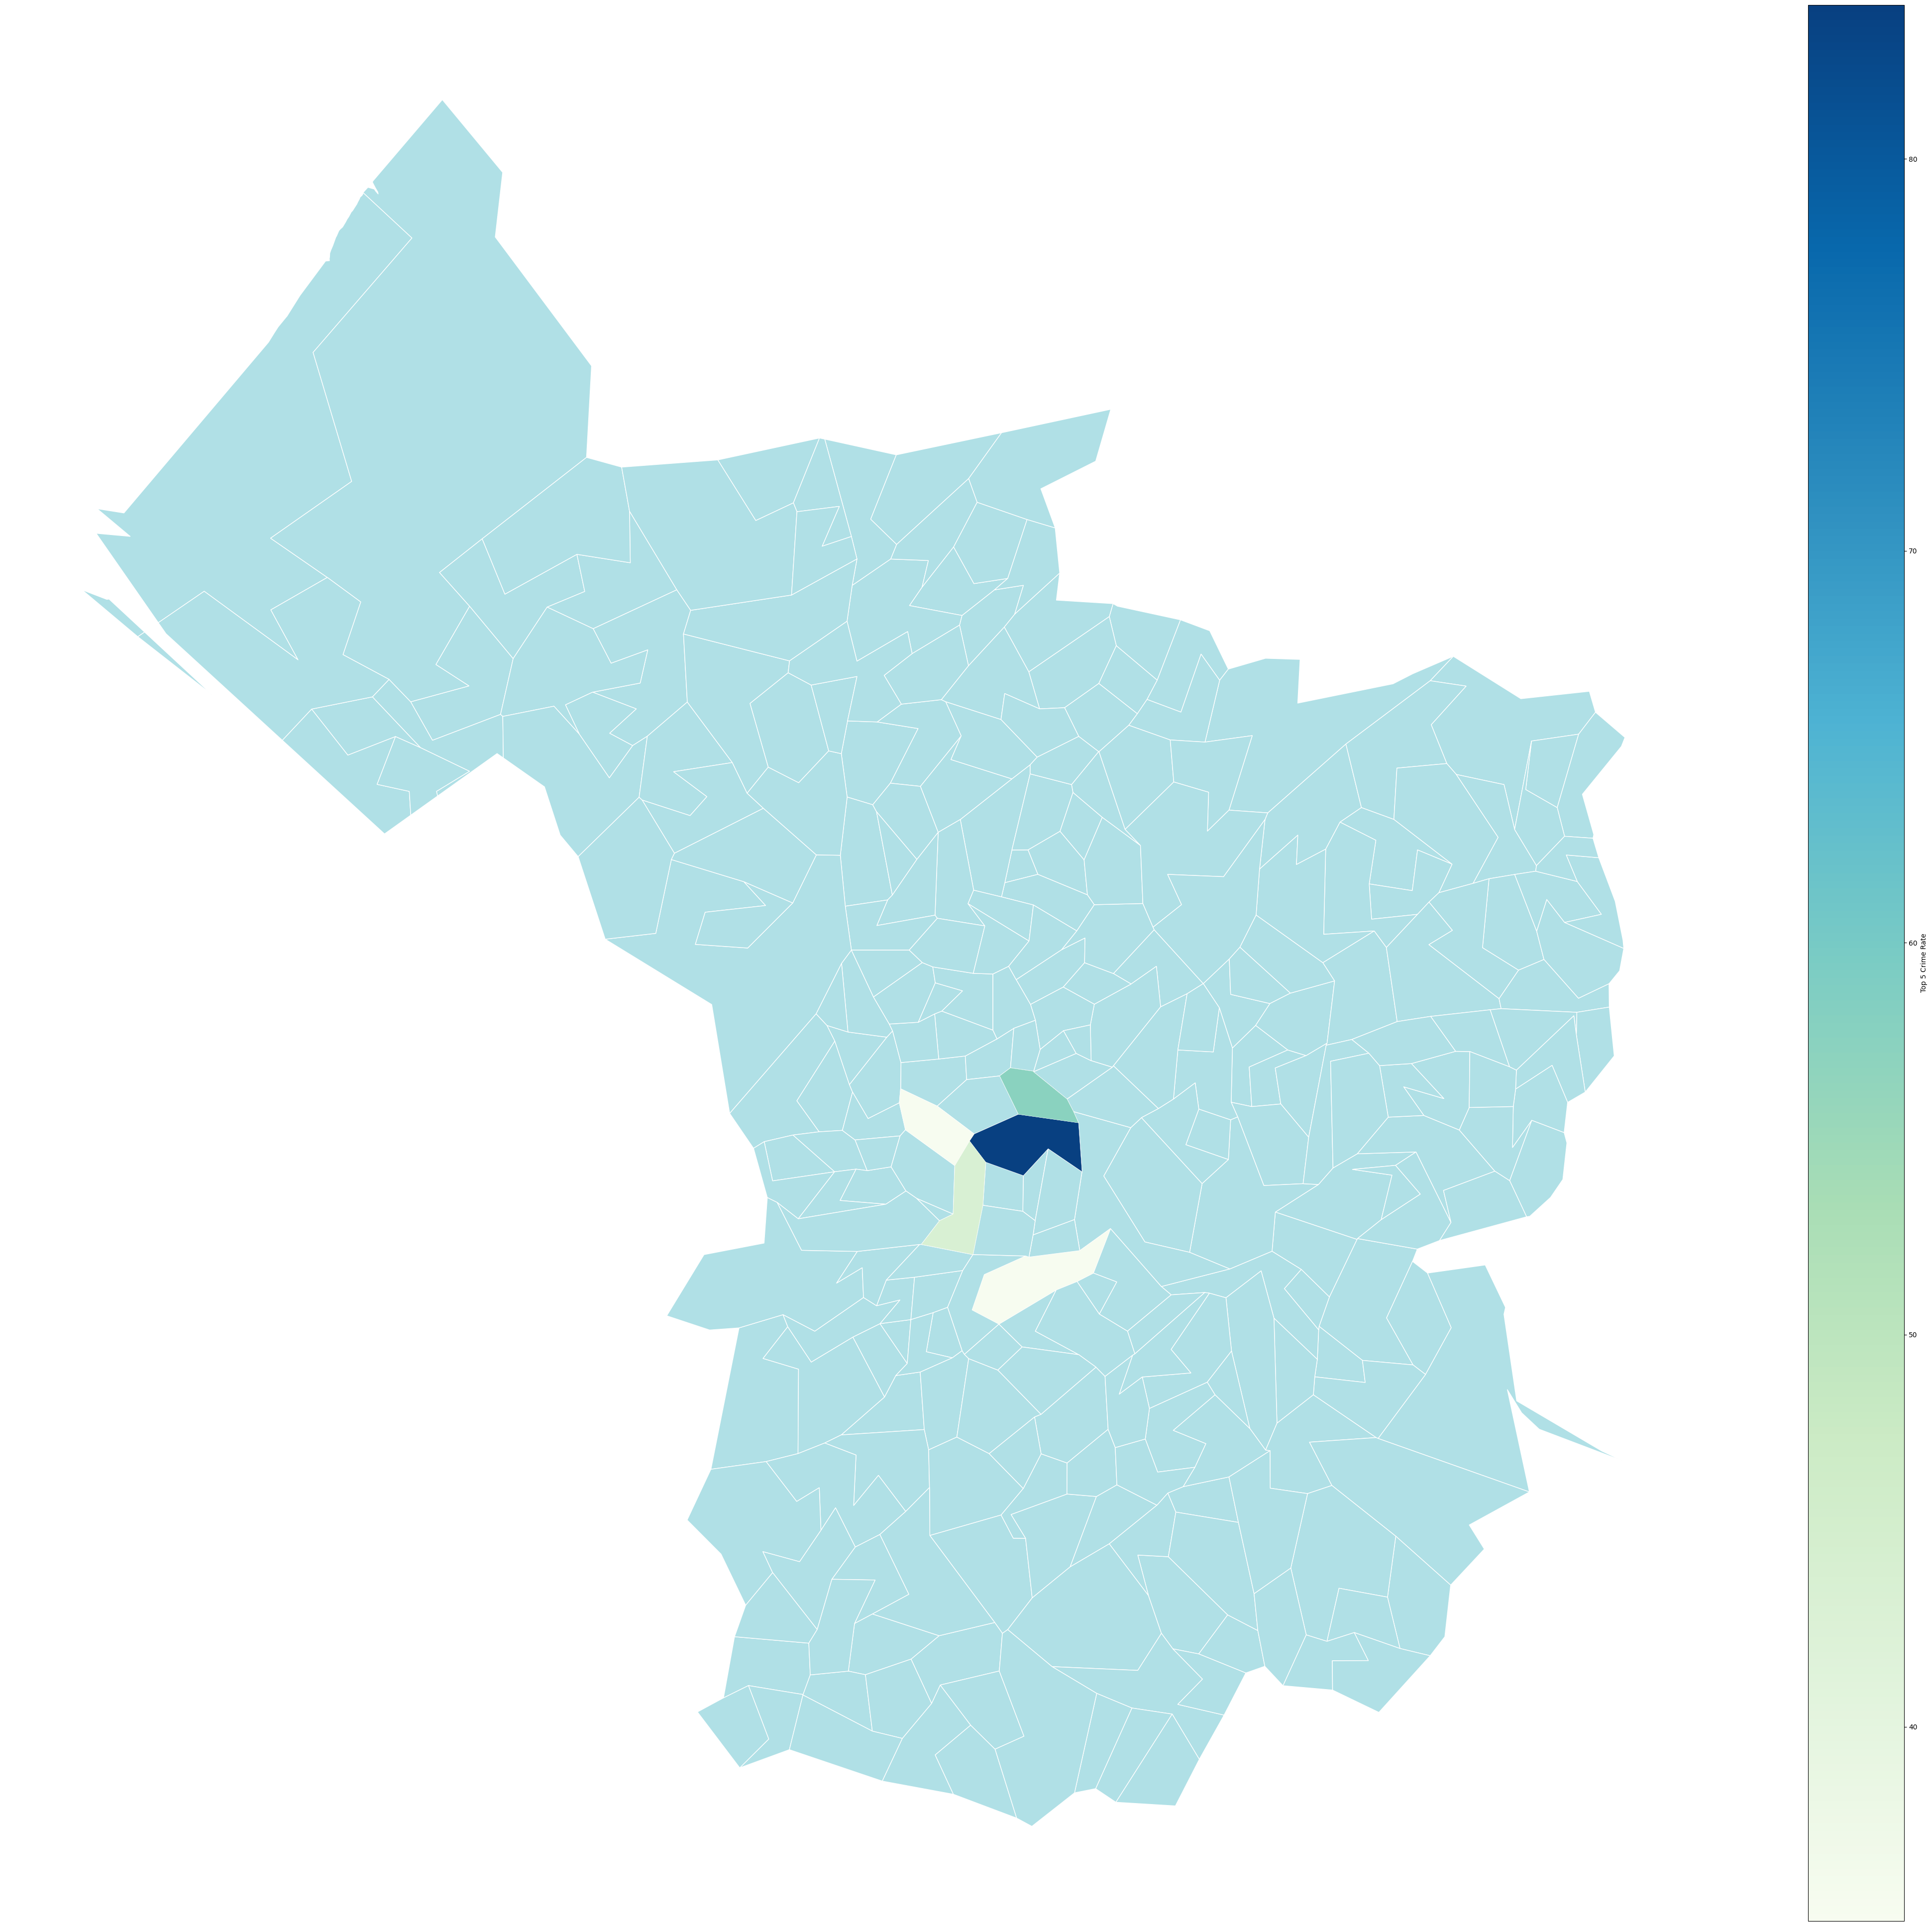

In [34]:
fig, ax = plt.subplots(figsize=(55, 50), subplot_kw=dict(aspect='equal'))
df1.plot(color='PowderBlue', edgecolor='white', linewidth=1.0, ax=ax)
top_5.plot(column='avg_crime_rate', cmap='GnBu', legend=True, ax=ax,
               legend_kwds={'label': "Top 5 Crime Rate"},
               edgecolor='white', linewidth=0.3)
ax.set_axis_off()

In [35]:
ldf = top_5.merge(df1[['lsoa_code', 'crime_growth']], on='lsoa_code')
ldf = ldf.merge(df3[['lsoa_code', 'crime_type']], on='lsoa_code')
ldf.head()

,FID,lsoa_code,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,LSOA21CD_1,...,RUC21NM,Urban_rura,Shape_Leng,Shape__Are,Shape__Len,geometry,population,avg_crime_rate,crime_growth,crime_type
0,31949,E01033907,Bristol 061A,None,359061,173092,51.4553,-2.59059,91160624-07d9-44dd-a870-595be6308587,E01033907,...,Urban: Nearer to a major town or city,Urban,2920.663689,395619.638416,2920.663689,"POLYGON ((359479.897 173282.294, 359512.542 17...",2240,83.928571,27.500000,Violence and sexual offences
1,31508,E01033342,Bristol 025E,None,359072,173532,51.4593,-2.59048,419de9a4-fa08-4872-955f-42df32c3d250,E01033342,...,Urban: Nearer to a major town or city,Urban,1978.956945,211604.600674,1978.956945,"POLYGON ((359057.874 173767.01, 359055.887 173...",2220,57.545045,21.008403,Violence and sexual offences
2,31951,E01033909,Bristol 061C,None,358350,172797,51.4526,-2.60079,a810a12c-f82f-4bdb-a2c7-19e35ead6899,E01033909,...,Urban: Nearer to a major town or city,Urban,2772.477076,305510.982250,2772.477076,"POLYGON ((358607.013 172912.889, 358580 172507...",2294,43.482999,3.571429,Violence and sexual offences
3,31517,E01033359,Bristol 039E,None,359064,171825,51.4439,-2.59040,6689619c-d0b2-4cd2-bed5-33b98754fa7c,E01033359,...,Urban: Nearer to a major town or city,Urban,3391.785346,460605.790733,3391.785346,"POLYGON ((359619.252 171869.676, 359465.736 17...",1739,35.221392,25.000000,Violence and sexual offences
4,31947,E01033905,Bristol 060C,None,358147,173243,51.4566,-2.60376,bdcf7f76-540b-4c64-a1fb-d6802184aca1,E01033905,...,Urban: Nearer to a major town or city,Urban,2128.930023,244250.330185,2128.930023,"POLYGON ((358151 173439, 358498.585 173176.724...",1522,35.041612,29.166667,Violence and sexual offences


In [37]:
ldf = ldf[['lsoa_code', 'LSOA21NM', 'population', 'avg_crime_rate', 'crime_growth', 'crime_type']]
ldf.head()

,lsoa_code,LSOA21NM,population,avg_crime_rate,crime_growth,crime_type
0,E01033907,Bristol 061A,2240,83.928571,27.500000,Violence and sexual offences
1,E01033342,Bristol 025E,2220,57.545045,21.008403,Violence and sexual offences
2,E01033909,Bristol 061C,2294,43.482999,3.571429,Violence and sexual offences
3,E01033359,Bristol 039E,1739,35.221392,25.000000,Violence and sexual offences
4,E01033905,Bristol 060C,1522,35.041612,29.166667,Violence and sexual offences
